<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-PyTorch-LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x.numpy(), y.numpy()

## Data Visualization

Text(0, 0.5, 'y')

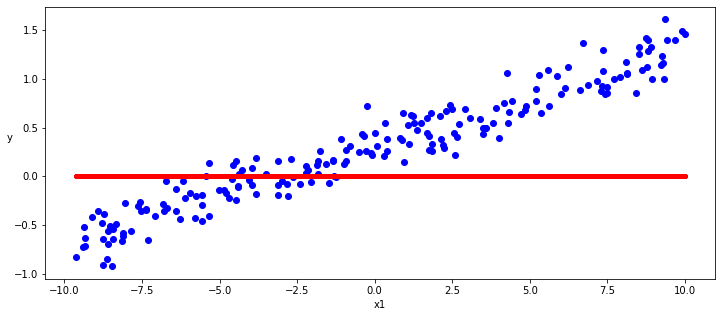

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionPyTorch, self).__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])

    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.13722364604473114
Step 40, Loss 0.10789026319980621
Step 60, Loss 0.10007990151643753
Step 80, Loss 0.0941861942410469
Step 100, Loss 0.08883558213710785
Step 120, Loss 0.08390257507562637
Step 140, Loss 0.0793493241071701
Step 160, Loss 0.07514624297618866
Step 180, Loss 0.07126636058092117
Step 200, Loss 0.0676848441362381
Step 220, Loss 0.06437873840332031
Step 240, Loss 0.06132686138153076
Step 260, Loss 0.05850967392325401
Step 280, Loss 0.05590911954641342
Step 300, Loss 0.05350853130221367
Step 320, Loss 0.05129256099462509
Step 340, Loss 0.04924698919057846
Step 360, Loss 0.047358714044094086
Step 380, Loss 0.04561564326286316
Step 400, Loss 0.04400661587715149
Step 420, Loss 0.04252133518457413
Step 440, Loss 0.04115024954080582
Step 460, Loss 0.03988458961248398
Step 480, Loss 0.03871626779437065


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

# criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    # optimizer.zero_grad()
    loss.backward()
    # optimizer.step()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 0.1007709801197052
Epoch 20 : Loss 0.093314990401268
Epoch 40 : Loss 0.08792829513549805
Epoch 60 : Loss 0.08305801451206207
Epoch 80 : Loss 0.07856921851634979
Epoch 100 : Loss 0.07442609965801239
Epoch 120 : Loss 0.07060160487890244
Epoch 140 : Loss 0.06707119196653366
Epoch 160 : Loss 0.06381227821111679
Epoch 180 : Loss 0.06080395355820656
Epoch 200 : Loss 0.058026984333992004
Epoch 220 : Loss 0.05546354129910469
Epoch 240 : Loss 0.053097233176231384
Epoch 260 : Loss 0.05091289058327675
Epoch 280 : Loss 0.04889649525284767
Epoch 300 : Loss 0.047035180032253265
Epoch 320 : Loss 0.04531700909137726
Epoch 340 : Loss 0.04373093694448471
Epoch 360 : Loss 0.042266856878995895
Epoch 380 : Loss 0.040915340185165405
Epoch 400 : Loss 0.039667755365371704
Epoch 420 : Loss 0.03851610794663429
Epoch 440 : Loss 0.03745301812887192
Epoch 460 : Loss 0.036471687257289886
Epoch 480 : Loss 0.0355658158659935


# Data Visualization

In [13]:
tf_model.params["w"].numpy(), tf_model.params["b"].numpy(), w.tolist()[0][0], b.tolist()[0]

(0.098684676, 0.19453356, 0.098753422498703, 0.20813030004501343)

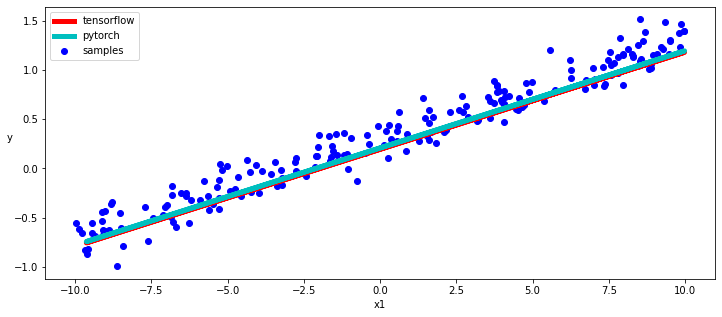

In [14]:
with torch.no_grad():
  x_train, y_train = generate_data()
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x_train,y_train, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * inputs + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)